# myAOAnet

In [1]:
import os
from os.path import join
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, accuracy_score
%matplotlib inline

In [21]:
data_dir = 'data_1606' + '/sigma_1e05'
aoa_dict = {}
#fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data5', 'field.data6', 'field.data7', 'field.data10', 'field.data11', 'field.data15']
fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
              'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
              'field.data20', 'field.data21', 'field.data22', 'field.data23', \
              'field.data30', 'field.data31']

for filename in os.listdir(data_dir):
    if filename.startswith("deg_m") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[- float(filename[5:-4])] = aoa_Rjk
    elif filename.startswith("deg_") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[float(filename[4:-4])] = aoa_Rjk

In [22]:
num_fields = aoa_dict[0].shape[1]
aoa_dict[-70].head(50)

,field.data0,field.data1,field.data2,field.data3,field.data4,field.data5,field.data6,field.data7,field.data10,field.data11,field.data12,field.data13,field.data14,field.data15,field.data20,field.data21,field.data22,field.data23,field.data30,field.data31
0,4.602139e-05,0.0,2.728041e-03,3.477469e-04,1.615333e-03,-4.162380e-04,1.170857e-03,-4.417467e-05,0.165659,0.0,9.319966e-02,-3.759206e-02,6.972003e-02,-1.179264e-02,0.061505,0.0,4.221761e-02,9.267663e-03,0.030411,0.0
1,3.155654e-05,0.0,2.230315e-03,2.889006e-04,1.354000e-03,-3.390432e-04,1.015770e-03,-3.898374e-05,0.161718,0.0,9.326146e-02,-3.724286e-02,7.207772e-02,-1.254013e-02,0.062923,0.0,4.478166e-02,9.443698e-03,0.033308,0.0
2,8.014423e-06,0.0,6.271420e-04,7.903644e-05,3.842830e-04,-9.794009e-05,2.929547e-04,-1.707953e-05,0.050502,0.0,2.944805e-02,-1.176364e-02,2.304892e-02,-4.381312e-03,0.020062,0.0,1.454703e-02,2.833237e-03,0.010959,0.0
3,7.542429e-08,0.0,1.524277e-08,-2.688672e-09,-5.310693e-08,-2.355300e-08,2.008944e-08,-6.304157e-09,0.000004,0.0,-8.264981e-08,-5.218864e-08,3.956306e-08,4.026884e-08,0.000005,0.0,-1.459249e-07,1.316696e-07,0.000005,0.0
4,7.500106e-08,0.0,1.264690e-08,-5.012261e-09,-4.692037e-08,-1.040814e-08,2.304140e-08,-1.194707e-08,0.000004,0.0,-3.429146e-08,-3.143363e-08,4.335958e-08,-5.180494e-08,0.000005,0.0,-1.301528e-07,1.497762e-07,0.000005,0.0
5,7.505871e-08,0.0,8.555015e-09,5.317883e-10,-4.732498e-08,-2.211159e-08,2.359709e-08,-4.630587e-09,0.000004,0.0,-1.121577e-07,-9.980977e-08,1.668849e-08,-1.476686e-08,0.000005,0.0,-1.273227e-07,1.496259e-07,0.000005,0.0
6,7.452688e-08,0.0,8.985070e-09,-4.193117e-09,-4.392242e-08,-1.757004e-08,1.612555e-08,-6.195466e-09,0.000004,0.0,-1.371847e-08,-3.159752e-08,8.304234e-08,-2.759806e-08,0.000005,0.0,-1.424470e-07,1.165894e-07,0.000005,0.0
7,7.469722e-08,0.0,1.230564e-08,-2.054874e-09,-4.655519e-08,-1.904603e-08,2.515043e-08,-7.156897e-09,0.000004,0.0,-5.598705e-08,-1.471019e-08,6.405429e-08,-1.672308e-08,0.000005,0.0,-1.612352e-07,1.373878e-07,0.000005,0.0
8,7.534910e-08,0.0,1.556402e-08,-1.120517e-08,-4.839833e-08,-1.997095e-08,1.929168e-08,-6.018098e-09,0.000004,0.0,-1.603154e-08,-6.942076e-08,4.997782e-08,-1.033879e-08,0.000005,0.0,-1.112397e-07,1.419297e-07,0.000005,0.0
9,7.576931e-08,0.0,6.105137e-09,-3.612215e-09,-4.895785e-08,-1.813240e-08,2.405759e-08,-1.548606e-08,0.000004,0.0,-4.020964e-08,-3.332629e-08,6.941502e-08,-4.250547e-08,0.000005,0.0,-1.360384e-07,1.770334e-07,0.000005,0.0


In [23]:
#Degree to Radian
for key in aoa_dict.keys():
    aoa_dict[key]['theta'] = key * math.pi / 180

# Show detection of LoRa beacon when Rjk is significant
field_thres = 1e-04

for key in aoa_dict.keys():
    print("%s shape of signal-presenting snapshots = %.01f" % (str(aoa_dict[key][abs(aoa_dict[key]['field.data2']) > field_thres].shape), key))

(226, 21) shape of signal-presenting snapshots = 0.0
(248, 21) shape of signal-presenting snapshots = 60.0
(195, 21) shape of signal-presenting snapshots = -50.0
(238, 21) shape of signal-presenting snapshots = -60.0
(182, 21) shape of signal-presenting snapshots = -40.0
(203, 21) shape of signal-presenting snapshots = 20.0
(225, 21) shape of signal-presenting snapshots = 70.0
(214, 21) shape of signal-presenting snapshots = 40.0
(186, 21) shape of signal-presenting snapshots = 30.0
(270, 21) shape of signal-presenting snapshots = -30.0
(209, 21) shape of signal-presenting snapshots = -70.0
(222, 21) shape of signal-presenting snapshots = -20.0
(255, 21) shape of signal-presenting snapshots = 10.0
(259, 21) shape of signal-presenting snapshots = -10.0
(233, 21) shape of signal-presenting snapshots = 50.0


/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# Differentiate R of LoRa signal or noise
aoa_sig, aoa_noi = {}, {}
for key in aoa_dict.keys():
    aoa_sig[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) < field_thres].index)
    aoa_noi[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].index)
    
#aoa_sig[-70]

In [25]:
# Xaoa = aoa_sig <-> theta[Rad]
Xaoa = pd.concat([aoa_sig[rad] for rad in range(-70, 80, 10)], keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
idx = pd.IndexSlice

In [26]:
print(Xaoa.shape)
Xaoa.loc[idx[[-10, 0, 30, 70], :], :]
Xaoa

(3365, 21)


field.data0  field.data1  field.data2  field.data3  \
Series name Row ID                                                       
-70         0          0.000046          0.0     0.002728     0.000348   
            1          0.000032          0.0     0.002230     0.000289   
            2          0.000008          0.0     0.000627     0.000079   
            27         0.000004          0.0     0.000310     0.000150   
            28         0.000120          0.0    -0.000454    -0.003152   
...                         ...          ...          ...          ...   
 70         707        0.002506          0.0     0.003383     0.023918   
            708        0.002359          0.0     0.003174     0.022460   
            709        0.001897          0.0     0.002347     0.017940   
            710        0.001451          0.0     0.001547     0.013673   
            711        0.000982          0.0     0.000807     0.009173   

                    field.data4  field.data5  field.data6  field.data7  \
Series name Row ID                                                       
-70         0          0.001615    -0.000416     0.001171    -0.000044   
            1          0.001354    -0.000339     0.001016    -0.000039   
            2          0.000384    -0.000098     0.000293    -0.000017   
            27         0.000223     0.000034     0.000113     0.000085   
            28        -0.000799    -0.001858     0.000271    -0.001878   
...                         ...          ...          ...          ...   
 70         707       -0.016969     0.003560     0.009624    -0.030561   
            708       -0.016128     0.003234     0.009060    -0.029390   
            709       -0.013109     0.002452     0.008144    -0.025374   
            710       -0.010135     0.001830     0.006969    -0.020548   
            711       -0.006896     0.001067     0.005356    -0.014184   

                    field.data10  field.data11  ...  field.data13  \
Series name Row ID                              ...                 
-70         0           0.165659           0.0  ...     -0.037592   
            1           0.161718           0.0  ...     -0.037243   
            2           0.050502           0.0  ...     -0.011764   
            27          0.028097           0.0  ...     -0.005342   
            28          0.165926           0.0  ...     -0.029510   
...                          ...           ...  ...           ...   
 70         707         0.233392           0.0  ...      0.166462   
            708         0.218569           0.0  ...      0.157591   
            709         0.172999           0.0  ...      0.126773   
            710         0.130789           0.0  ...      0.097287   
            711         0.086527           0.0  ...      0.065134   

                    field.data14  field.data15  field.data20  field.data21  \
Series name Row ID                                                           
-70         0           0.069720     -0.011793      0.061505           0.0   
            1           0.072078     -0.012540      0.062923           0.0   
            2           0.023049     -0.004381      0.020062           0.0   
            27          0.011273      0.002239      0.011953           0.0   
            28          0.082327      0.023186      0.068399           0.0   
...                          ...           ...           ...           ...   
 70         707        -0.278442     -0.132870      0.120211           0.0   
            708        -0.267317     -0.125657      0.114910           0.0   
            709        -0.229677     -0.108304      0.093950           0.0   
            710        -0.186047     -0.087480      0.073229           0.0   
            711        -0.127907     -0.061592      0.049657           0.0   

                    field.data22  field.data23  field.data30  field.data31  \
Series name Row ID                                                           
-70         0           0

### Save/Load DataFrame

In [27]:
df_name = "LOS_sigma1e05.csv"
Xaoa.to_csv(join(data_dir, df_name), index=True, header=True)

In [28]:
Xaoa0 = pd.read_csv(join(data_dir, df_name), index_col=[0, 1])
Xaoa0

field.data0  field.data1  field.data2  field.data3  \
Series name Row ID                                                       
-70         0          0.000046          0.0     0.002728     0.000348   
            1          0.000032          0.0     0.002230     0.000289   
            2          0.000008          0.0     0.000627     0.000079   
            27         0.000004          0.0     0.000310     0.000150   
            28         0.000120          0.0    -0.000454    -0.003152   
...                         ...          ...          ...          ...   
 70         707        0.002506          0.0     0.003383     0.023918   
            708        0.002359          0.0     0.003174     0.022460   
            709        0.001897          0.0     0.002347     0.017940   
            710        0.001451          0.0     0.001547     0.013673   
            711        0.000982          0.0     0.000807     0.009173   

                    field.data4  field.data5  field.data6  field.data7  \
Series name Row ID                                                       
-70         0          0.001615    -0.000416     0.001171    -0.000044   
            1          0.001354    -0.000339     0.001016    -0.000039   
            2          0.000384    -0.000098     0.000293    -0.000017   
            27         0.000223     0.000034     0.000113     0.000085   
            28        -0.000799    -0.001858     0.000271    -0.001878   
...                         ...          ...          ...          ...   
 70         707       -0.016969     0.003560     0.009624    -0.030561   
            708       -0.016128     0.003234     0.009060    -0.029390   
            709       -0.013109     0.002452     0.008144    -0.025374   
            710       -0.010135     0.001830     0.006969    -0.020548   
            711       -0.006896     0.001067     0.005356    -0.014184   

                    field.data10  field.data11  ...  field.data13  \
Series name Row ID                              ...                 
-70         0           0.165659           0.0  ...     -0.037592   
            1           0.161718           0.0  ...     -0.037243   
            2           0.050502           0.0  ...     -0.011764   
            27          0.028097           0.0  ...     -0.005342   
            28          0.165926           0.0  ...     -0.029510   
...                          ...           ...  ...           ...   
 70         707         0.233392           0.0  ...      0.166462   
            708         0.218569           0.0  ...      0.157591   
            709         0.172999           0.0  ...      0.126773   
            710         0.130789           0.0  ...      0.097287   
            711         0.086527           0.0  ...      0.065134   

                    field.data14  field.data15  field.data20  field.data21  \
Series name Row ID                                                           
-70         0           0.069720     -0.011793      0.061505           0.0   
            1           0.072078     -0.012540      0.062923           0.0   
            2           0.023049     -0.004381      0.020062           0.0   
            27          0.011273      0.002239      0.011953           0.0   
            28          0.082327      0.023186      0.068399           0.0   
...                          ...           ...           ...           ...   
 70         707        -0.278442     -0.132870      0.120211           0.0   
            708        -0.267317     -0.125657      0.114910           0.0   
            709        -0.229677     -0.108304      0.093950           0.0   
            710        -0.186047     -0.087480      0.073229           0.0   
            711        -0.127907     -0.061592      0.049657           0.0   

                    field.data22  field.data23  field.data30  field.data31  \
Series name Row ID                                                           
-70         0           0

## Preparation

### Add Gaussian Noise

In [35]:
noise = np.random.normal(0, 0.0001, Xaoa.shape)

In [36]:
# Corrupt Xaoa
Xaoa_noisy = Xaoa + noise

In [37]:
# Xarr: time series of Rjk
Xaoa_cpy = Xaoa_noisy.copy(deep=True)

Xarr, ylst = np.empty((0, 3, 20), dtype='float32'), []
rowt_0, rowt_1, rowt_2 = None, None, None
row_up, row_mid, row_down = -1, -1, -1

for serName in range(-70, 80, 10):
    isFirstRow = True
    isSecRow = True
    for rowId, row in Xaoa_cpy.loc[serName].iterrows():
        row_up = row_mid
        rowt_2 = rowt_1
        row_mid = row_down
        rowt_1 = rowt_0
        row_down = rowId
        rowt_0 = row.drop('theta').to_numpy(dtype='float32').reshape(1, 1, 20)
        if isFirstRow:
            isFirstRow = False
            continue
        
        if isSecRow:
            isSecRow = False
            continue
        
        if row_down-row_mid==1 and row_mid-row_up==1:
            arr_tmp = np.concatenate((rowt_2, rowt_1, rowt_0), axis=1)
            
            Xarr = np.append(Xarr, arr_tmp, axis=0)
            ylst.append(row['theta'])
            
print(Xarr.shape, len(ylst))

(2303, 3, 20) 2303


In [38]:
# Xvec: slice of a Rjk row
Xvec = Xaoa_cpy.drop('theta', axis=1).to_numpy()
yvec = Xaoa_cpy['theta'].to_numpy()
yvec.shape

(3051,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Xarr, ylst, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(1842, 3, 20)

In [41]:
# Normalization
mmsc = MinMaxScaler()
mmsc.fit(X_train.reshape(-1, X_train.shape[-1]))
X_train_std = mmsc.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_std = mmsc.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [42]:
ymax = max(y_train)
ymin = min(y_train)
y_train_std = (y_train - ymin)/(ymax-ymin)
y_test_std = (y_test - ymin)/(ymax-ymin)

In [43]:
len(y_test)

461

## Training
### LSTM

In [44]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add, LSTM, RepeatVector, TimeDistributed
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers, Sequential
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils, plot_model

In [45]:
time_steps = 3
feature_dim = 20

# define model
x = Input(shape=(time_steps, feature_dim))
h1 = LSTM(128, activation='relu', return_sequences=True)(x)
h2 = LSTM(64, activation='relu')(h1)
h3 = Dense(9, activation='relu')(h2)
r = Dense(1, activation='sigmoid')(h3)

model = Model(inputs=x, outputs=r)
model.compile(optimizer='adam', loss='mse')
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 126,291
Trainable params: 126,291
Non-trainable params: 0
_________________________________________________________________


In [46]:
epochs = 20
batch_size = 50

history = model.fit(X_train_std, y_train_std, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_std, y_test_std))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1842 samples, validate on 461 samples
Epoch 1/20
1842/1842 [==============================] - 3s 1ms/step - loss: 0.0510 - val_loss: 0.0080
Epoch 2/20
1842/1842 [==============================] - 0s 244us/step - loss: 0.0064 - val_loss: 0.0039
Epoch 3/20
1842/1842 [==============================] - 0s 243us/step - loss: 0.0041 - val_loss: 0.0027
Epoch 4/20
1842/1842 [==============================] - 0s 250us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 5/20
1842/1842 [==============================] - 0s 254us/step - loss: 0.0012 - val_loss: 9.1938e-04
Epoch 6/20
1842/1842 [==============================] - 0s 249us/step - loss: 8.2667e-04 - val_loss: 7.1337e-04
Epoch 7/20
1842/1842 [==============================] - 1s 299us/step - loss: 6.7515e-04 - val_loss: 5.0243e-04
Epoch 8/20
1842/1842 [==============================] - 1s 289us/step - loss: 5.3174e-04 - val_loss: 5.0705e-04

dict_keys(['val_loss', 'loss'])


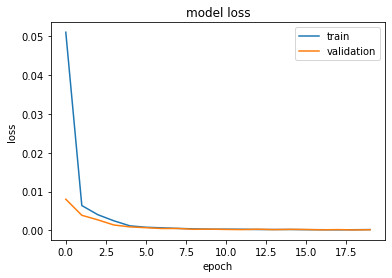

In [47]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [48]:
pred_y_test_std = model.predict(X_test_std)
pred_y_test = pred_y_test_std*(ymax-ymin) + ymin
pred_y_test_std.shape

(461, 1)

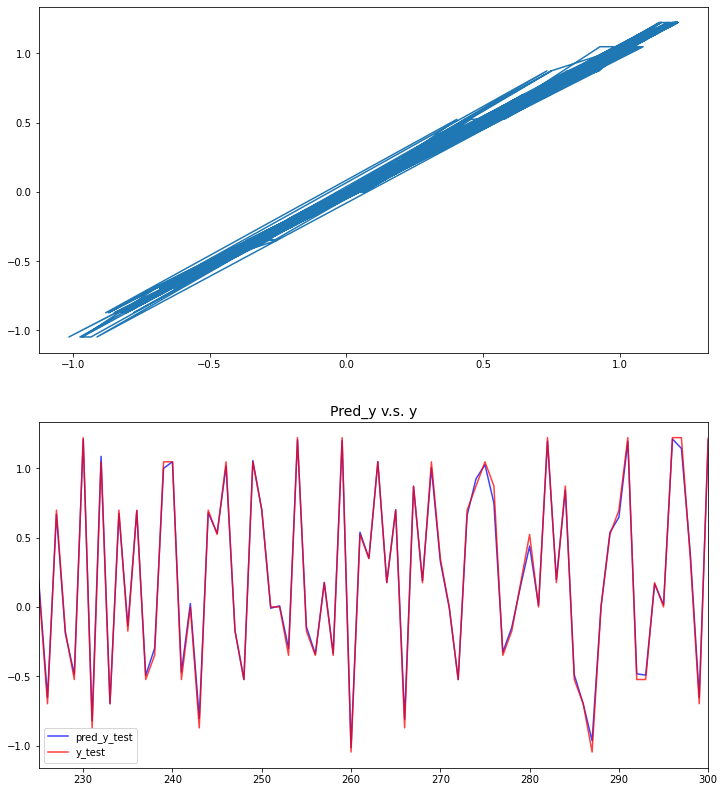

In [49]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_y_test.shape[0])], list(pred_y_test), color='b', alpha=0.75, label='pred_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"Pred_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='best')
ax_lst[1].set_xlim([225, 300])
plt.show()

In [51]:
rmse_lstm = np.sqrt(mean_squared_error(y_test, pred_y_test))
print("RMSE of LSTM-only: ", rmse_lstm)
print("I.E. %.04f degree of mean error" % (rmse_lstm/math.pi*180))

RMSE of LSTM-only:  0.03386932962151689
I.E. 1.9406 degree of mean error


### LSTM-Autoencoder

In [52]:
time_steps = 3
feature_dim = 20

x0 = Input(shape=(time_steps, feature_dim))
l1 = LSTM(128, activation='relu', return_sequences=True)(x0)
l2 = LSTM(64, activation='relu', return_sequences=False)(l1)
h0 = RepeatVector(time_steps)(l2)
l3 = LSTM(64, activation='relu', return_sequences=True)(h0)
l4 = LSTM(128, activation='relu', return_sequences=True)(l3)
r0 = TimeDistributed(Dense(feature_dim))(l4)

LSTM_AE = Model(inputs=x0, outputs=r0)
LSTM_AE.compile(optimizer='adam', loss='mse')
LSTM_AE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 64)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 64)             33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 128)            98816     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 3, 20)             2580      
Total para

In [53]:
epochs=20
batch_size = 50

LSTM_AE.fit(X_train_std, X_train_std, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test_std, X_test_std))

Train on 1842 samples, validate on 461 samples
Epoch 1/20
1842/1842 [==============================] - 5s 3ms/step - loss: 0.2688 - val_loss: 0.1417
Epoch 2/20
1842/1842 [==============================] - 1s 465us/step - loss: 0.1151 - val_loss: 0.0828
Epoch 3/20
1842/1842 [==============================] - 1s 495us/step - loss: 0.0637 - val_loss: 0.0577
Epoch 4/20
1842/1842 [==============================] - 1s 482us/step - loss: 0.0577 - val_loss: 0.0557
Epoch 5/20
1842/1842 [==============================] - 1s 507us/step - loss: 0.0463 - val_loss: 0.0344
Epoch 6/20
1842/1842 [==============================] - 1s 619us/step - loss: 0.0308 - val_loss: 0.0245
Epoch 7/20
1842/1842 [==============================] - 1s 602us/step - loss: 0.0206 - val_loss: 0.0168
Epoch 8/20
1842/1842 [==============================] - 1s 470us/step - loss: 0.0146 - val_loss: 0.0125
Epoch 9/20
1842/1842 [==============================] - 1s 567us/step - loss: 0.0118 - val_loss: 0.0109
Epoch 10/20
1842/18

In [54]:
pred_X_test_std = LSTM_AE.predict(X_test_std, verbose=0)
print('---Predicted---')
print(np.round(pred_X_test_std, 4))
print('---Actual---')
print(np.round(X_test_std, 4))

---Predicted---
[[[ 7.8760e-01  5.0570e-01  7.5950e-01 ...  6.4410e-01  9.0520e-01
    5.7880e-01]
  [ 7.8650e-01  5.2070e-01  7.4600e-01 ...  6.3370e-01  9.1160e-01
    5.6330e-01]
  [ 7.8850e-01  5.2660e-01  7.4160e-01 ...  6.3400e-01  9.1230e-01
    5.4760e-01]]

 [[ 9.4250e-01  5.6650e-01 -1.3800e-02 ...  4.8960e-01  1.0250e+00
    5.4440e-01]
  [ 9.5510e-01  5.4640e-01 -4.0000e-04 ...  4.9720e-01  1.0150e+00
    5.4110e-01]
  [ 9.6200e-01  5.6580e-01  1.6100e-02 ...  5.1280e-01  1.0024e+00
    5.5030e-01]]

 [[ 9.5720e-01  5.7170e-01 -1.7100e-02 ...  5.2110e-01  1.0420e+00
    5.4630e-01]
  [ 9.5930e-01  5.4730e-01 -2.3000e-03 ...  5.2420e-01  1.0177e+00
    5.4100e-01]
  [ 9.6020e-01  5.6350e-01  1.7300e-02 ...  5.3710e-01  9.9550e-01
    5.4840e-01]]

 ...

 [[ 9.6790e-01  5.3920e-01  1.8300e-02 ...  2.9860e-01  1.0073e+00
    5.5350e-01]
  [ 9.8230e-01  5.3980e-01  1.5200e-02 ...  2.8820e-01  1.0322e+00
    5.3750e-01]
  [ 9.5590e-01  5.5900e-01  2.6000e-02 ...  2.8730e-01  1.0

In [55]:
encoder = Model(inputs=x0, outputs=l2)
encoder.compile(optimizer='adam', loss='mse')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
Total params: 125,696
Trainable params: 125,696
Non-trainable params: 0
_________________________________________________________________


In [56]:
pred_encoded_X_train_std = encoder.predict(X_train_std)
pred_encoded_X_test_std = encoder.predict(X_test_std)
pred_encoded_X_test_std.shape

(461, 64)

### SVR on Encoded R-features

In [57]:
# SVR
svr_3 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.3)
svr_3.fit(pred_encoded_X_train_std, y_train)
svr_3.score(pred_encoded_X_test_std, y_test)

0.9283137688901247

In [58]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_3,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(pred_encoded_X_train_std, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
SVR(C=5)
0.9862173287039605


In [59]:
svr_best3 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_best3.fit(pred_encoded_X_train_std, y_train)
svr_best3.score(pred_encoded_X_test_std, y_test)

0.9946246125199586

In [60]:
pred_EncodeSVR_y_test = svr_best3.predict(pred_encoded_X_test_std)
rmse3 = np.sqrt(mean_squared_error(y_test, pred_EncodeSVR_y_test))
print("RMSE for SVR3:", rmse3)
print("I.E. %.04f degree of mean error" % (rmse3/math.pi*180))

RMSE for SVR3: 0.043304510277221
I.E. 2.4812 degree of mean error


In [61]:
len(y_test)

461

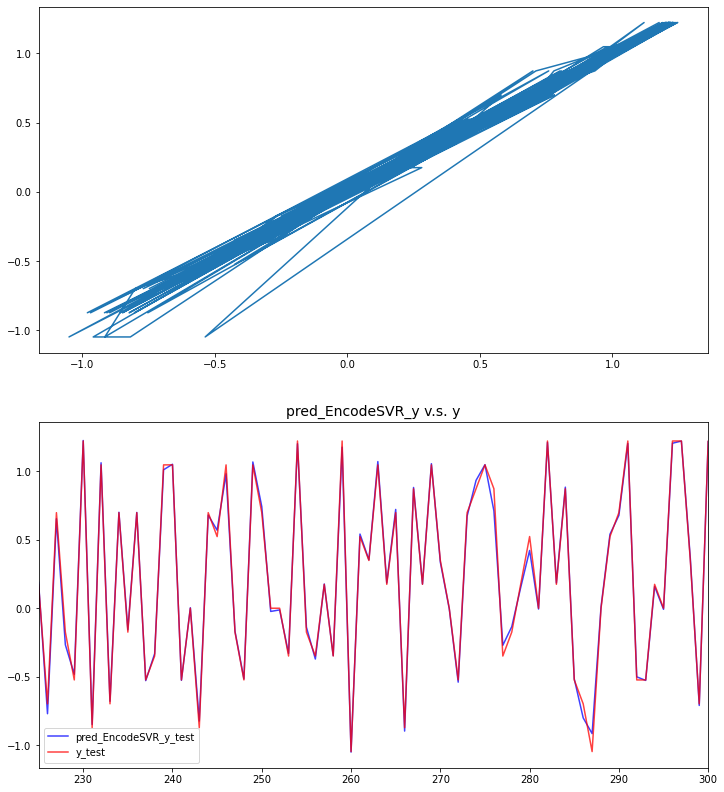

In [62]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_EncodeSVR_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_EncodeSVR_y_test.shape[0])], list(pred_EncodeSVR_y_test), color='b', alpha=0.75, label='pred_EncodeSVR_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"pred_EncodeSVR_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='best')
ax_lst[1].set_xlim([225, 300])
plt.show()

### Directly apply SVR on Rjk

In [63]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(Xvec, yvec, test_size=0.2, random_state=42)

In [64]:
svr_0 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_0.fit(X_train0, y_train0)
svr_0.score(X_test0, y_test0)

0.9805557555500787

In [65]:
pred_SVR0_y_test = svr_0.predict(X_test0)
rmse0 = np.sqrt(mean_squared_error(y_test0, pred_SVR0_y_test))
print("RMSE for SVR0:", rmse0)
print("I.E. %.04f degree of mean error" % (rmse0/math.pi*180))

RMSE for SVR0: 0.08836599389014793
I.E. 5.0630 degree of mean error


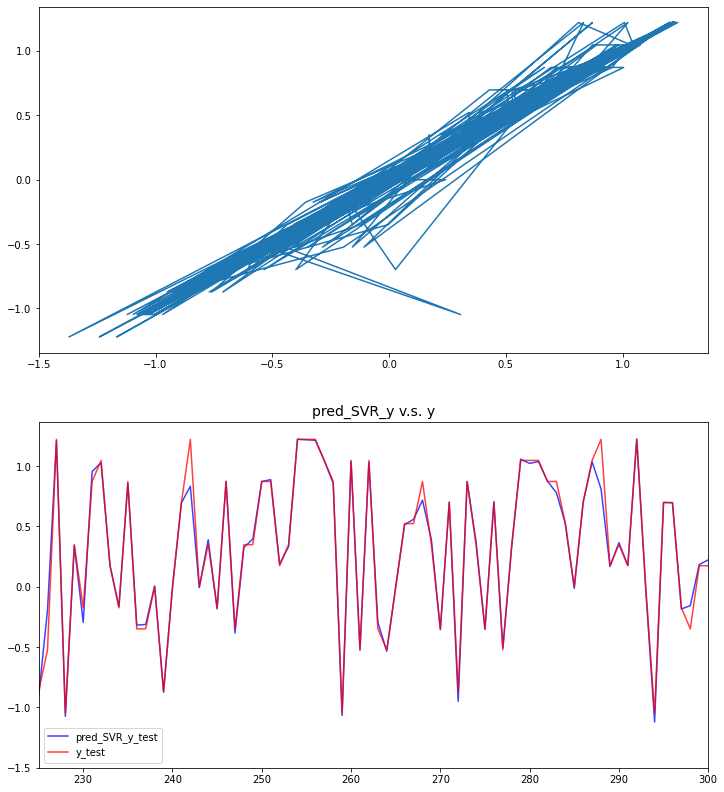

In [66]:
fig0 ,ax_lst0 = plt.subplots(2, 1,figsize=(12,14))
ax_lst0[0].plot(pred_SVR0_y_test, y_test0)
ax_lst0[1].plot([i for i in range(pred_SVR0_y_test.shape[0])], list(pred_SVR0_y_test), color='b', alpha=0.75, label='pred_SVR_y_test')
ax_lst0[1].plot(y_test0, color='red', alpha=0.75, label='y_test')
ax_lst0[1].set_title(f"pred_SVR_y v.s. y",fontsize=14)
ax_lst0[1].grid(False)
ax_lst0[1].legend(loc='best')
ax_lst0[1].set_xlim([225, 300])
plt.show()